In [109]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">HERE</a>.''')


# Exploratory Analysis of DB1B

### Welcome to the  Airline Origin and Destination Survey (DB1B) analysis

 ### Overview of the DB1B dataset:
The Airline Origin and Destination Survey dataset, also known as DB1B, is a 10% random sample of airline tickets data collected by the Office of Airline Information of the Bureau of Transportation and Statistics. DB1B was created specifically to determine patterns for air traffic, air carrier market shares, and passenger flows.

The dataset can be accessed from <a href="https://www.transtats.bts.gov/tables.asp?db_id=125&DB_Name=Airline%20Origin%20and%20Destination%20Survey%20%28DB1B%29">HERE</a>

### Coverage:
The survey covers a 10% sample of airline tickets from reporting carriers.

 ### Availability:
 __First Year__	    &emsp;&emsp;1993<br>
__Last Year__	    &emsp;&emsp;2018<br>
__Frequency__	    &nbsp;&emsp;Quarterly

### Data Tables

Before dive into the detailed description of each of these tables and its fields, it is important to first understand the terminology and the relationship structure between the three table sets. First, DB1B ticket table gives the most basic information about an itinerary which includes origin airport, origin city, fare, miles flown, reporting carrier and whether or not the trip is a round trip. The DB1B market focuses on the characteristics regarding each directional market. For example, if in the ticket table an itinerary is classified as a roundtrip, the market table should contain two entries detailing each trip (origin and destination) along with the details regarding miles flown, market fare and carrier change indicator. Last but not least, is the coupons table, which serves to provide all the details from the previously described tables along with any breaks along the trip. 



##### DB1BCoupon
This table provides coupon-specific information for each domestic itinerary of the Origin and Destination Survey, such as the operating carrier, origin and destination airports, number of passengers, fare class, coupon type, trip break indicator, and distance. Below is the first few entries in this table:

In [125]:
DIR_DEST = '/home/bear-b/users/wtian002/mitch-b/dmis-research/Tianyi/2018/farelogix/2017_data/'

In [110]:
df_coupon_20147q4 = pd.read_csv(DIR_DEST+'794566555_T_DB1B_COUPON_2017_4.csv')
df_coupon_20147q4.drop(['Unnamed: 15'],axis=1,inplace=True)
df_coupon_20147q4[df_coupon_20147q4.ITIN_ID == 2017415]

,ITIN_ID,MKT_ID,COUPONS,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST,DEST_STATE_ABR,REPORTING_CARRIER,PASSENGERS,FARE_CLASS,DISTANCE
4,2017415,201741501,2,10146,30146,ABY,GA,10397,30397,ATL,GA,9E,1.0,Y,145.0
5,2017415,201741502,2,10397,30397,ATL,GA,10146,30146,ABY,GA,9E,1.0,Y,145.0


##### DB1BMarket
This table contains directional market characteristics of each domestic itinerary of the Origin and Destination Survey, such as the reporting carrier, origin and destination airport, prorated market fare, number of market coupons, market miles flown, and carrier change indicators. Below is the first few entries in this table:

In [111]:
df_market_20147q4 = pd.read_csv(DIR_DEST+'794566555_T_DB1B_MARKET_2017_4.csv')
df_market_20147q4.drop(['Unnamed: 13'],axis=1,inplace=True)
df_market_20147q4[df_market_20147q4.ITIN_ID == 2017415]

,ITIN_ID,MKT_ID,MARKET_COUPONS,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST,DEST_STATE_ABR,REPORTING_CARRIER,MARKET_MILES_FLOWN
4,2017415,201741501,1,10146,30146,ABY,GA,10397,30397,ATL,GA,9E,145.0
5,2017415,201741502,1,10397,30397,ATL,GA,10146,30146,ABY,GA,9E,145.0


##### DB1BTicket
This table contains summary characteristics of each domestic itinerary on the Origin and Destination Survey, including the reporting carrier, itinerary fare, number of passengers, originating airport, roundtrip indicator, and miles flown. Below is the first few entries in this table:

In [112]:
df_ticket_20147q4 = pd.read_csv(DIR_DEST+'847404501_T_DB1B_TICKET_2017_4.csv')
df_ticket_20147q4.drop(['Unnamed: 16'],axis=1,inplace=True)
df_ticket_20147q4[df_ticket_20147q4.ITIN_ID == 2017415]

,ITIN_ID,COUPONS,ORIGIN,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ROUNDTRIP,ONLINE,ITIN_YIELD,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,BULK_FARE,DISTANCE_GROUP,MILES_FLOWN,ITIN_GEO_TYPE
4,2017415,2,ABY,10146,1014602,30146,1.0,1.0,0.0379,9E,1.0,11.0,0.0,1,290.0,2


Above is a detailed example illustrating the relationship of each table. From the table, we can observe that a traveler with itinerary id 2017415 purchased a ticket to make a roundtrip from Albany, New York to Atlanta, Georgia and back to Albany. The ticket table serves to illustrate the origin airport, along with the total price of the fare, the total distance traveled, an indicator to specify it was a round trip and many other details. The market table further details the destination airport, along with the total distance flown each way. 

## In the following section, we will demonstrate some of the DB1B statistic results for the year 2017 

### Import the crude oil price from 2006 to 2017
Below is a sample table of the historical crude oil price dataset. It can be obtained from <a href="https://fred.stlouisfed.org/series/DCOILWTICO">OECD</a>

In [113]:
df_oil = pd.read_csv('DCOILWTICO.csv')
df_oil.dropna(axis=0,inplace=True)
df_oil = df_oil[df_oil.DCOILWTICO != '.']
df_oil.DCOILWTICO = df_oil.DCOILWTICO.astype(float)
df_oil.DATE = pd.to_datetime(df_oil.DATE, format='%Y-%m-%d')
df_oil = df_oil.set_index('DATE')
df_oil_mean = df_oil.groupby(pd.Grouper(freq="M")).mean().round(2)
df_oil_mean.rename(columns={'DCOILWTICO':'crude oil price'},inplace=True)
df_oil_mean.head()

,crude oil price
DATE,
2006-01-31,65.48
2006-02-28,61.63
2006-03-31,62.69
2006-04-30,69.44
2006-05-31,70.84


### Import CPI index from 2006 to 2017
Below is a sample table of the historical CPI index dataset. It can be obtained from <a href="https://fred.stlouisfed.org/series/CPALTT01USM659N">OECD</a>

In [114]:
df_cpi_un = pd.read_csv('CPALTT01USM659N_unadj.csv').round(2)
df_cpi_un['DATE'] = pd.to_datetime(df_cpi_un['DATE'])
df_cpi_un = df_cpi_un[df_cpi_un['DATE'] < '2018']
df_cpi_un.rename(columns={'CPALTT01USM659N':'cpi unadjusted'}, inplace=True)

df_cpi_un.head()

,DATE,cpi unadjusted
0,2006-01-01,3.99
1,2006-02-01,3.60
2,2006-03-01,3.36
3,2006-04-01,3.55
4,2006-05-01,4.17


### Import the DB1B ticket data from 2006 to 2017 

In [116]:
# 2016.csv contains data from year 2016
df_2016 = pd.read_csv(DIR_DEST+'2016.csv')
df_2016['YEAR_QUARTER'] = '2016Q'+ df_2016['QUARTER'].astype('str')
df_2016['DATETIME'] = pd.to_datetime(df_2016['YEAR_QUARTER'])
df_2016 = df_2016[['ITIN_FARE', 'DATETIME', 'REPORTING_CARRIER','PASSENGERS']]
df_2016 = df_2016.dropna(how='any',axis=0)
# 2017.csv contains data from year 2-17
df_2017_temp = pd.read_csv(DIR_DEST+'2017.csv')
df_2017_temp['YEAR_QUARTER'] = '2017Q'+ df_2017_temp['QUARTER'].astype('str')
df_2017_temp['DATETIME'] = pd.to_datetime(df_2017_temp['YEAR_QUARTER'])
df_2017_temp = df_2017_temp[['ITIN_FARE', 'DATETIME', 'REPORTING_CARRIER','PASSENGERS']]
df_2017_temp = df_2017_temp.dropna(how='any',axis=0)
#10y.csv contains all the data from 2006 to 2015
df_10 = pd.read_csv(DIR_DEST+'10y.csv')
df_list = [df_10,df_2016,df_2017_temp]

df_merge = pd.concat(df_list, ignore_index=True, sort=True)
df_merge.drop(['Unnamed: 0'],axis=1,inplace=True)
df_merge.rename(columns = {'DATETIME':'DATE'}, inplace=True)
# AVG_FARE column contains the iternarary fare per passenger
df_merge['AVG_FARE'] = df_merge.ITIN_FARE / df_merge.PASSENGERS
df_merge['DATE'] = pd.to_datetime(df_merge['DATE']).dt.date
df_trend = df_merge[['DATE','AVG_FARE']].groupby(['DATE']).mean().round(2)

In [117]:
df_merge.head()

,DATE,ITIN_FARE,PASSENGERS,REPORTING_CARRIER,AVG_FARE
0,2006-01-01,122.0,1.0,AA,122.0
1,2006-01-01,158.0,1.0,AA,158.0
2,2006-01-01,609.0,1.0,AA,609.0
3,2006-01-01,706.0,1.0,AA,706.0
4,2006-01-01,0.0,1.0,AA,0.0


### Trend of Average Fare Price, Crude Oil Price, and CPI Index
In the chart below, we plot the crude oil price and CPI index data from above together with the average fare price from DB1B. This chart illustrates the relationship between oil price, inflation (CPI) and airline industry cost/price. As oil prices move up or down, inflation follows in the same direction. The reason why this happens is that oil is a major input in the economy – it is used in critical activities such as fueling transportation and heating homes – and if input costs rise, so should the cost of end products. For example, if the price of oil rises, then it will cost more to make aviation fuel, and an airline company will then pass on some or all of this cost to the consumer, which raises prices and thus inflation.

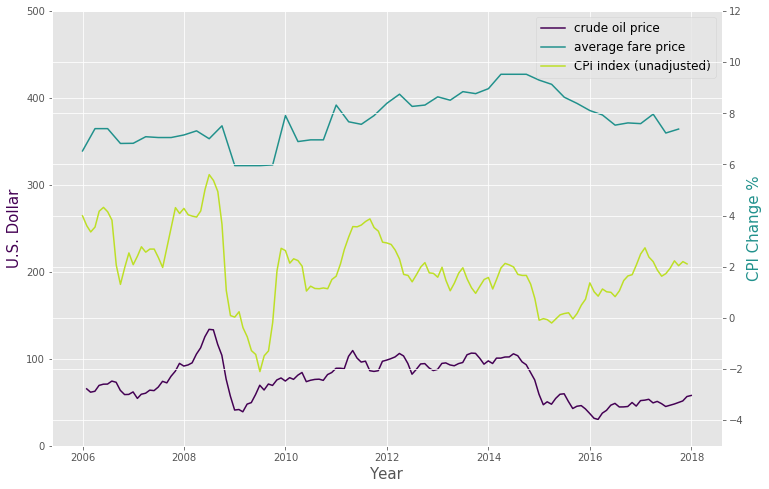

In [118]:
fig = plt.figure(figsize=(12, 8))
host = fig.add_subplot(111)

par1 = host.twinx()

host.set_ylim(0, 500)
par1.set_ylim(-5, 12)

host.set_xlabel("Year",fontsize=15)
host.set_ylabel("U.S. Dollar",fontsize=15)
par1.set_ylabel("CPI Change %",fontsize=15)

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(df_oil_mean.index,df_oil_mean['crude oil price'], color=color1,label="crude oil price")
p2, = host.plot(df_trend.index, df_trend['AVG_FARE'], color=color2, label="average fare price")
p3, = par1.plot(df_cpi_un.DATE,df_cpi_un['cpi unadjusted'], color=color3, label="CPI Index (unadjusted)")

lns = [p1, p2, p3]
host.legend(handles=lns, loc='best',bbox_to_anchor=(1, 1),fontsize=12)

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.show()

### Coupon Number Distribution
It is essential to know, for a given itinerary, the number of segments contained in the itinerary. The minimal number of coupons is 1 and reaches 13. The figure below shows, for example, the distribution of the number of coupons bought by passengers on an itinerary in the year 2017. We can see that the proportion of tickets with 7 coupons or more seems negligible.


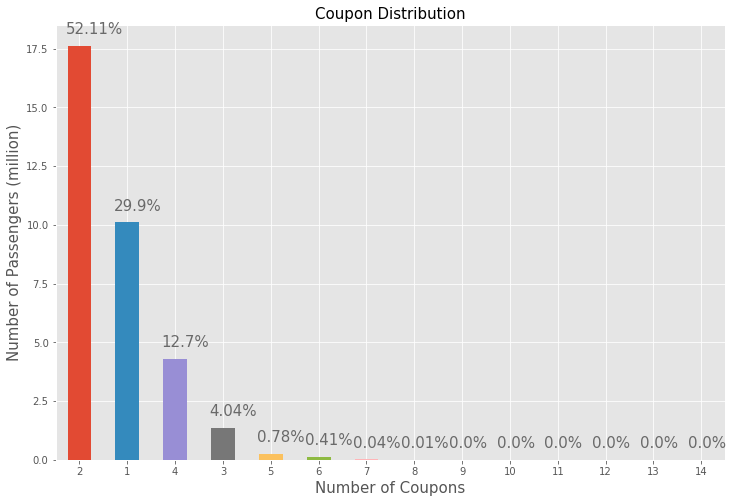

In [119]:
df_2017 = pd.read_csv(DIR_DEST+'2017.csv')
plt.figure(figsize=(12, 8))
coupon_distrib = df_2017.groupby(['COUPONS'])['PASSENGERS'].sum().sort_values(ascending=False)/1000000

ax = coupon_distrib.plot.bar(rot=0)

totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

plt.title('Coupon Distribution', fontsize = 15)
plt.xlabel('Number of Coupons',fontsize=15)
plt.ylabel('Number of Passengers (million)',fontsize=15)
plt.show()

### Fare Class Distribution

There are 6 different type of fare class defined by the DOT: split into restricted and unrestricted, there are first (unrestricted: code F; restricted: code G), business (respectively codes C and D) or coach class (Y or X) coupons. The DOT stresses that these classes are defined by carriers and can differ from one airline to another. In the figure below, we can dis that the proportion of passengers in the Business fare class only represent 1.8% of all coupons bought in the year 2017, whereas the coach class tickets represents more than 94% of all these coupons. This statistic shows, in fact, a characteristic of the U.S. domestic market: the passenger discrimination is focused on 2 fare classes: the first class and coach class. 


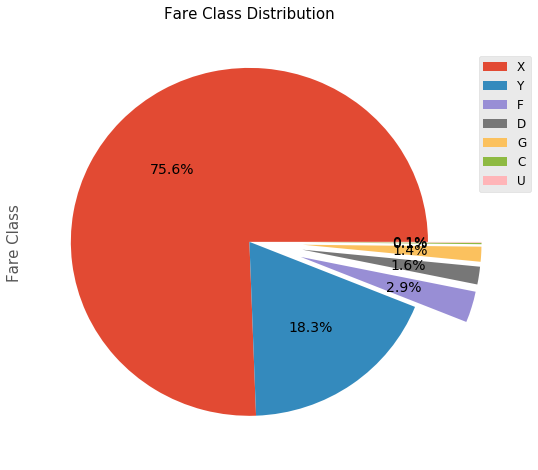

In [120]:
path_list = []
for dirpath,_,filenames in os.walk(DIR_DEST+'coupon'):
    for f in filenames:
        if not f[0] == '.':
            path_list.append(os.path.abspath(os.path.join(dirpath, f)))
            path_list.sort()

merge_list = []
for frame in path_list:
    df_temp = pd.read_csv(frame)
    merge_list.append(df_temp)
df_coupon_class = pd.concat(merge_list)
df_coupon_class.drop(['Unnamed: 1'],axis=1,inplace=True)
df_coupon_class.dropna(axis=0, inplace=True)

plt.figure(figsize=(8,8))
fair_class_distrib = df_coupon_class['FARE_CLASS'].value_counts()
explode = (0,0,0.3,0.3,0.3,0.3,0.3)
fair_class_distrib.plot.pie(labels=None, autopct='%1.1f%%',
                            shadow=False, explode=explode, fontsize=14)
labels = ['X','Y','F','D','G','C','U']
plt.title('Fare Class Distribution',fontsize=15)
plt.legend(labels,loc="best",bbox_to_anchor=(1, 0.6),fontsize=12)
plt.ylabel('Fare Class', fontsize=15)
plt.show()

### State of Departure Distribution
This figure shows the distribution of the passengers having a trip in 2017 4th quarter  from a given state of origin. We can see that the outgoing traffic comes mostly from California, Texas, New York, Florida,  and Pennsylvania, which are also the most populous U.S. states. 

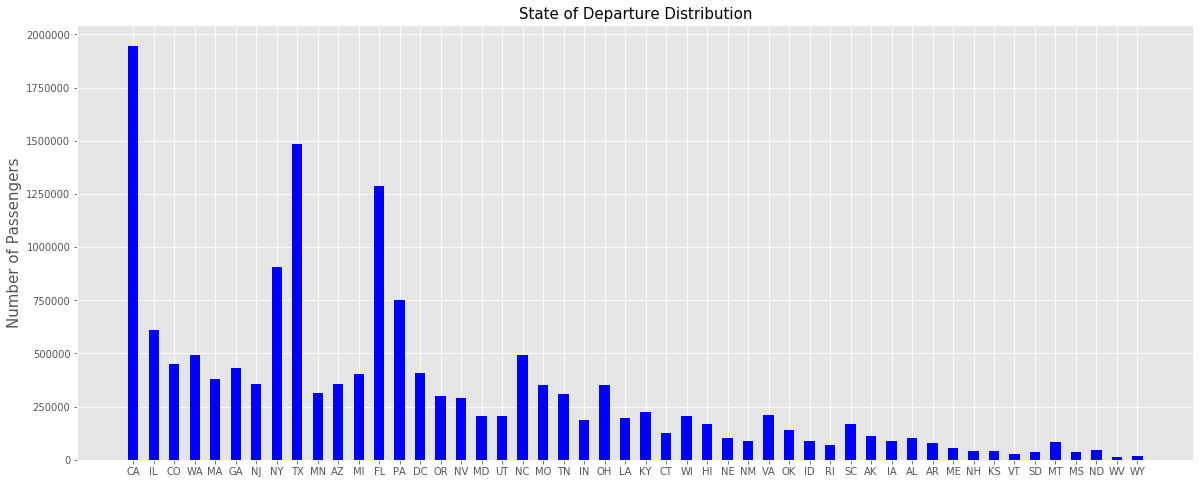

In [121]:
plt.figure(figsize=(20,8))

state_distrib = df_2017['ORIGIN'].value_counts()
state_distrib = state_distrib.to_dict()

# airport-codes.csv is the lookup table for airport and airport code
df_airport_code = pd.read_csv(DIR_DEST+'airport-codes.csv')

df_airport_code = df_airport_code[df_airport_code['iso_country'].astype(str) == 'US']
df_airport_code = df_airport_code[df_airport_code['iata_code'].notnull()]

state_convert_list = []
state_distrib_copy = {}

for key in state_distrib:
    for i, j in df_airport_code.iterrows():
        if str(key) == str(j['iata_code']):
            if str(j['iso_region']).split('-')[1] not in state_distrib_copy:
                state_distrib_copy[str(j['iso_region']).split('-')[1]] = int(state_distrib[key])
            else:
                state_distrib_copy[str(j['iso_region']).split('-')[1]] = state_distrib_copy[str(j['iso_region']).split('-')[1]] + int(state_distrib[key])

state_distrib_combine = state_distrib_copy
plt.bar(range(len(state_distrib_combine)), list(state_distrib_combine.values()), align='center', width=0.5 ,color='b')
plt.title('State of Departure Distribution',fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.xticks(range(len(state_distrib_combine)), list(state_distrib_combine.keys()))
plt.show()

### Passenger / State Population Distribution
By dividing the number of passengers for a given state by the population of this state, we can see from the graph below that the traffic concentration is pretty high for the less populous U.S. states, especially for the District of Columbia. We can also note the high percentage for Alaska, which can be explained by the difficulty for the residents to make domestic trips by other means of transportation than aircraft. The same arguments and the high level of tourism for Hawaii can explain the high percentage calculated for the island. For Nevada, the low population compared to the high traffic from Las Vegas and Reno also explains the high percentage for the state. Returning to the graph above, we can also note the very low outgoing traffic in Dakota, Wyoming and West Virginia, which are also among the less populated U.S. states.


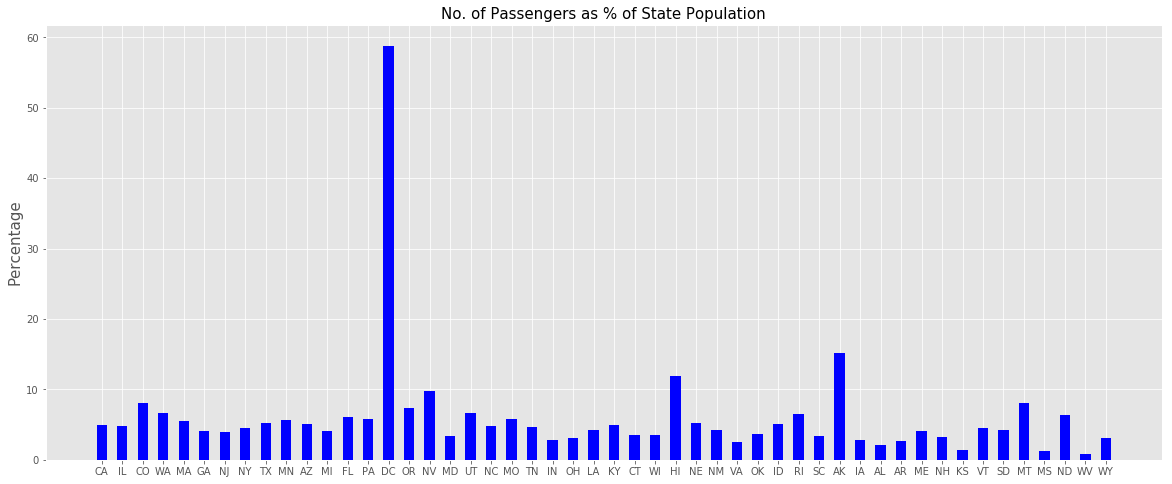

In [122]:
plt.figure(figsize=(20,8))

state_distrib = df_2017['ORIGIN'].value_counts()
state_distrib = state_distrib.to_dict()
df_state_pop = pd.read_csv(DIR_DEST+'state_pop.csv')
df_airport_code = pd.read_csv(DIR_DEST+'airport-codes.csv')
df_airport_code = df_airport_code[df_airport_code['iso_country'].astype(str) == 'US']
df_airport_code = df_airport_code[df_airport_code['iata_code'].notnull()]

state_convert_list = []
state_distrib_copy = {}

for key in state_distrib:
    for i, j in df_airport_code.iterrows():
        if str(key) == str(j['iata_code']):
            if str(j['iso_region']).split('-')[1] not in state_distrib_copy:
                state_distrib_copy[str(j['iso_region']).split('-')[1]] = int(state_distrib[key])
            else:
                state_distrib_copy[str(j['iso_region']).split('-')[1]] = state_distrib_copy[str(j['iso_region']).split('-')[1]] + int(state_distrib[key])

state_pop_distrib ={}
for key in state_distrib_copy:
    for i, j in df_state_pop.iterrows():
        if str(key) == str(j['Short']):
            state_pop_distrib[key] = (state_distrib_copy[key] / int(j['Pop']))* 100

state_distrib_combine = state_pop_distrib
plt.bar(range(len(state_distrib_combine)), list(state_distrib_combine.values()), align='center', width=0.5 ,color='b')
plt.title('No. of Passengers as % of State Population', fontsize = 15)
plt.ylabel('Percentage', fontsize=15)
plt.xticks(range(len(state_distrib_combine)), list(state_distrib_combine.keys()))
plt.show()

### Market Share Distribution
We can examine the distribution of the passengers in the year 2017 by respective reporting carrier and their percentage (figure below). We note that the top 5 largest reporting airlines (in terms of the number of passengers) consist of two low-cost carriers: Southwest, and Skywest and the 3 legacy carriers: Delta, American Airline, and United Airline.

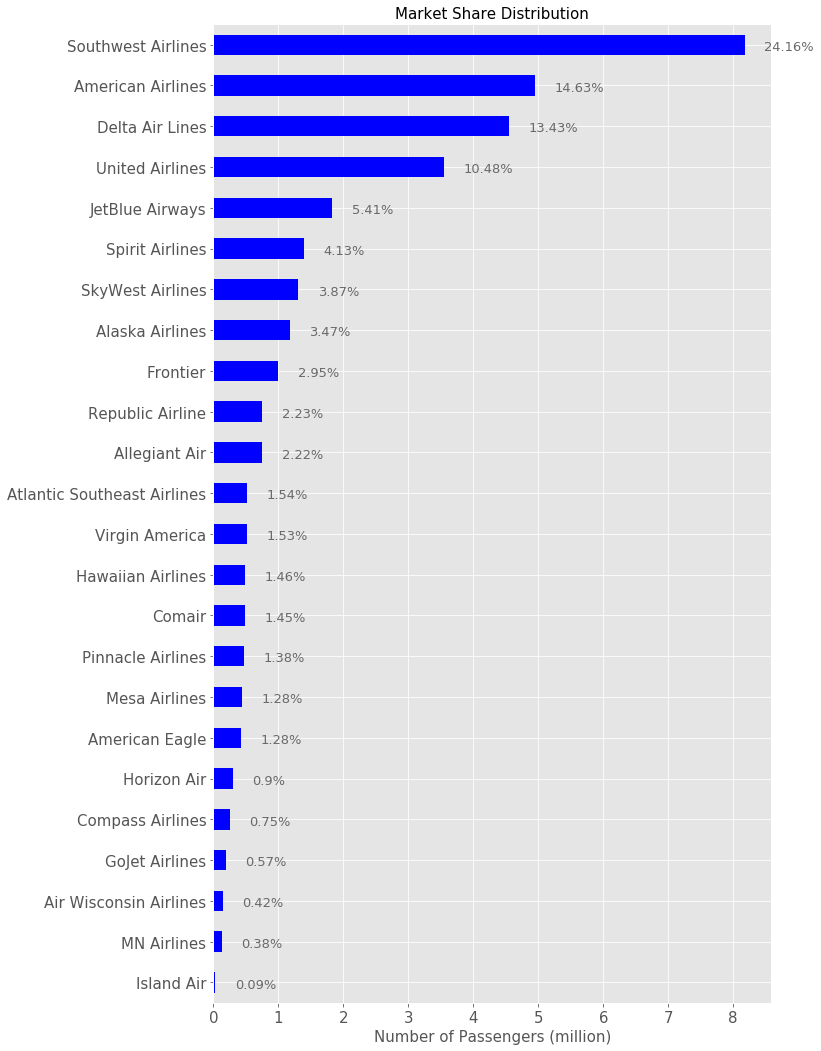

In [123]:
plt.figure(figsize=(10,18))
carrier_distrib = df_2017.groupby(['REPORTING_CARRIER'])['PASSENGERS'].sum().sort_values(ascending=False)/1000000
# airline_code.csv is the lookup table for airline name and its IATA code
df_airline_code = pd.read_csv(DIR_DEST+'airline_code.csv')
carrier_convert_list = []
for index, row in carrier_distrib.iteritems():
    for i, j in df_airline_code.iterrows():
        if str(index) == j['REPORTING_CARRIER']:
            carrier_convert_list.append(j['NAME'])

ax = carrier_distrib.plot.barh(color='b',fontsize=15,label=None)
plt.title('Market Share Distribution',fontsize=15)
#ax.set_xticklabels(carrier_convert_list,fontsize=15)

totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=13,
color='dimgrey')

ax.set_yticklabels(carrier_convert_list,fontsize=15)
plt.xlabel('Number of Passengers (million)',fontsize=15)
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()

### Airline Revenue Ranking
We can examine the revenue distribution in the year 2017 by respective reporting carrier and their percentage (figure below). We note that the top 5 reporting airlines by revenue (in terms of U.S. dollar) are Delta, American Airlines, United Airlines, Southwest and SkyWest. Being the legacy airline company, Delta, AA, and UA earn the most revenue compare to other low cost airlines.

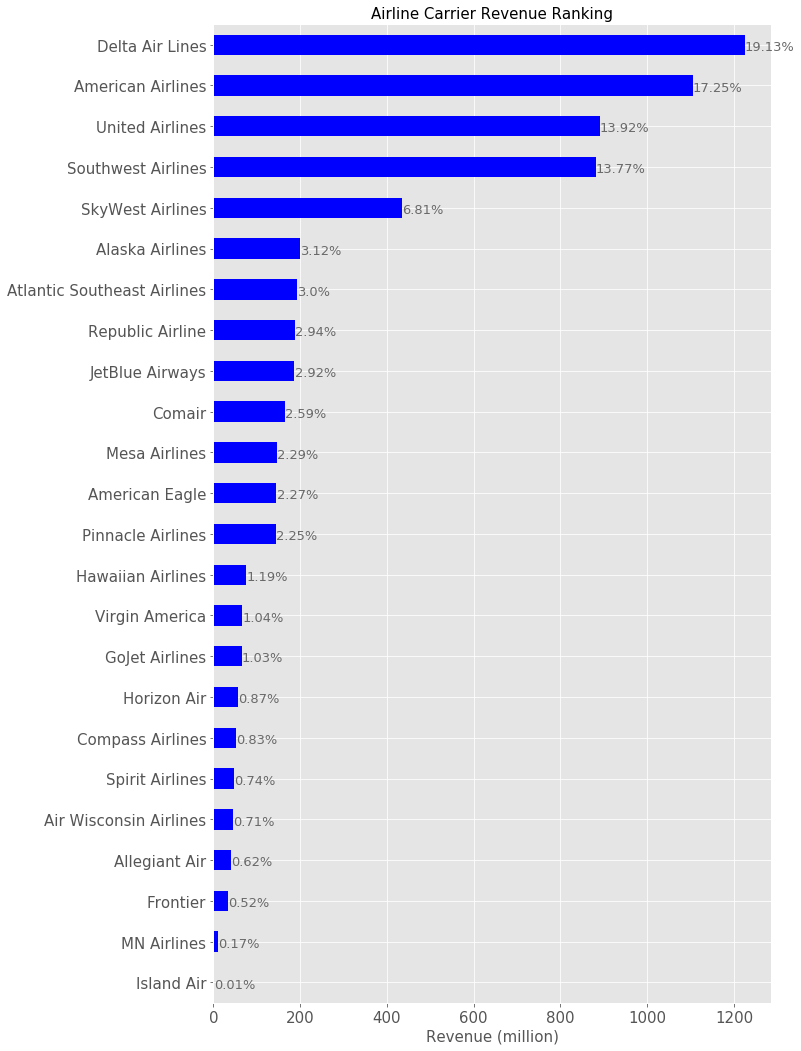

In [124]:
plt.figure(figsize=(10,18))
carrier_distrib = df_2017.groupby(['REPORTING_CARRIER'])['ITIN_FARE'].sum().sort_values(ascending=False)/1000000
df_airline_code = pd.read_csv(DIR_DEST+'airline_code.csv')
carrier_convert_list = []

for index, row in carrier_distrib.iteritems():
    for i, j in df_airline_code.iterrows():
        if str(index) == j['REPORTING_CARRIER']:
            carrier_convert_list.append(j['NAME'])

ax = carrier_distrib.plot.barh(color='b',fontsize=15)

totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=13,
color='dimgrey')


plt.title('Airline Carrier Revenue Ranking',fontsize=15)
ax.set_yticklabels(carrier_convert_list,fontsize=15)
#ax.set_xticklabels(carrier_convert_list,fontsize=15)

plt.xlabel('Revenue (million)',fontsize=15)
plt.ylabel('')
#ax.invert_yaxis()
plt.gca().invert_yaxis()
plt.show()